In [180]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import pylab
import scipy.stats as stats
from scipy.stats import shapiro
import scipy.stats as stats 
import statsmodels.stats.api as sms
import numpy as np 
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [102]:
class Information():
    def __init__(self,data):
        self.data=data
    def Describe(self):
        print(self.data.describe().T)
    def Info(self):
        print(self.data.info())
    def Head(self):
        print(self.data.head())
    def ColumnTypes(self):
        print(self.data.dtypes)
    def NullValues(self):
        print(self.data.isnull().values.any())
        print(self.data.isnull().sum())
    def Count(self):
        print(self.data.count())
    def Num_data(self):
        print(self.data.select_dtypes(include=['float64','int64']))
    def Cat_data(self):
        print(self.data.select_dtypes(include=["object"]))

In [103]:
class Visualization():
    def __init__(self,data):
        self.data = data
        
    def barplot(self,x,y,z = None):
        bar = sns.barplot(x = x, y = y, hue = z, data = self.data);
        return bar
    
    def catplot(self, x, y, z = None):
        cat = sns.catplot(x = x, y = y, hue = z, data = self.data);
        return cat
    
    def histogram(self,x, y = None):
        hist = sns.FacetGrid(self.data, hue = y, height = 5, xlim = (0, 10000)).map(sns.kdeplot, x, shade= True).add_legend();
        return hist
    
    def boxplot(self,x, y = None, z = None):
        box = sns.boxplot(x = x, y = y, hue = z, data=self.data);
        return box
    
    def jointplot(self,x,y):
        joint = sns.jointplot(x = x, y = y ,data = self.data, kind = "reg");
        return joint
    
    def scatter(self, x, y, z = None, s = None):
        sca = sns.scatterplot(x = x, y = y, hue=z, size = s, data = self.data);
        return sca
    
    def lmplot(self, x, y, z = None, c = None, r = None):
        lm = sns.lmplot(x = x, y = y, hue = z, col = c, row = r, data = self.data);
        return lm
    
    def pairplot(self, x = None):
        pair = sns.pairplot(self.data, kind = "reg", hue = x);
        return pair
    
    def heatmap(self):
        heat = sns.heatmap(self.data, annot = True, fmt = "d");
        return heat 
    
    def lineplot(self, x, y, z = None, s = None):
        lin = sns.lineplot(x = x, y = y, hue = z, style = s, markers = True,  dashes = False, data = self.data);
        return lin
    
    def countplot(self, column):
        count = sns.countplot(self.data.iloc[:,column], data = self.data, palette = "Set3");
        return count
    
    def cross_tab(self,x,y):
        cross = pd.crosstab(x, y)
        return cross

    def PieChart(self):
        pie = plt.pie(self.data, labels = self.data.index, counterclock = False, shadow = True)
        return pie
    
    def violin(self, x = None, y = None, z = None):
        vio = sns.catplot(x = x, y = y, hue = z, kind = "violin", data = self.data);
        return vio

In [104]:
class PreProcessing:
    
    def __init__(self, data):
        self.data = data

    def Delete_col(self, inplace):
        del_col = self.data.dropna(axis=1, inplace=inplace)
        return del_col
    
    def Delete_row(self, inplace):
        del_row = self.data.dropna(axis=0, inplace=inplace)
        return del_row
    
    def calc_vif(self):
        vif["variables"] = self.data.columns
        vif["VIF"] = [variance_inflation_factor(self.data.values, i) for i in range(self.data.shape[1])]
        return(vif)

    def Dummy(self):
        dummy_data = pd.get_dummies(self.data)
        return dummy_data

    def DropColumn(self, column):
        drop =  self.data.drop(column, inplace=True, axis=1)
        return drop

    def Label_Encoder(self, column):
        label_encoder = preprocessing.LabelEncoder()
        LE = label_encoder.fit_transform(self.data[column])
        return LE

In [105]:
class statistic():
    def __init__(self, data):
        self.data=data
        
        
    def shapiro(self):
        for col in self.data.columns[1:]:
            if self.data[col].dtypes != object :
                stat, p = shapiro(self.data[col])
                print('Shapiro Statistics=%.3f, p=%.3f' % (stat, p))
            alpha = 0.05
            if p > alpha:
                print(col)
                print('\033[1m'+ col + '\033[0m','Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject) \n')
            else:
                print('\033[1m'+ col + ":"+'\033[0m','Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)\n')
        
        
    def spearmanr(self, col_1, col_2):
        stats.spearmanr(self.data[col_1],self.data[col_2])
        alpha=0.05
        if(p>alpha):
            print('Statistics=%.3f, p=%.3f' % (stat,p), 'aralarındaki bu ilişki anlamsızdır') 
        else:
            print('Statistics=%.3f, p=%.3f' % (stat,p), 'aralarında bir ilişki vardır ve bu ilişki anlamlıdır')
        
    def leneve(self, col_1, col_2):
        stats.levene(self.data[col_1],self.data[col_2])
        print('Statistics=%.3f, p=%.3f' % (stat,p))
        
        
    def ttest_one(self,column,popmean):
        stat, p = self.stats.ttest_one(self.data[column], popmean = popmean)
        print("Statistics:%3.3f, p=%.3f " % (stat,p))
        
    def ttest_two(self, col_1, col_2):
        columns = pd.concat([self.data[col_1],self.data[col_2]], axis=1)
        stat, p=stats.ttest_ind(columns[col_1],columns[col_1], equal_var = False )
        print("Statistics:%3.3f, p=%.3f " % (stat,p))
        
        

In [106]:
import pandas as pd
from pandas import Series, DataFrame
data1 = pd.read_excel("HW_Data_Set.xlsx")
data=data1.copy()

In [107]:
inf_data = Information(data)

In [108]:
inf_data.Info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB
None


In [109]:
inf_data.Describe()

            count       mean        std         min        25%        50%  \
ind_5      6167.0  -0.803146  23.624403 -131.000000 -14.000000   0.000000   
ind_6      6167.0  -0.803470  23.624144 -131.000000 -14.000000   0.000000   
ind_8      6167.0  48.388890  36.388526    0.000000  14.285714  50.000000   
ind_9      6167.0  48.289282  36.478009    0.000000  14.285714  50.000000   
ind_10     6167.0   0.099609  60.414625 -100.000000 -50.000000   0.000000   
...           ...        ...        ...         ...        ...        ...   
ind_426    6167.0   0.498188   0.228547    0.000000   0.323783   0.495192   
ind_428    6167.0   0.490174   0.150483    0.083530   0.379894   0.487078   
20_target  6167.0  -0.057102  14.834497  -15.780588 -15.350354   0.000000   
50_target  6167.0  -2.906358  34.559778  -37.142889 -36.208094 -34.267756   
90_target  6167.0  -3.315072  36.841541  -38.573858 -37.695273 -35.788391   

                 75%         max  
ind_5      13.000000   76.000000  
ind_6

In [110]:
inf_data.Head()

   ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428  20_target  50_target  90_target

In [111]:
inf_data.ColumnTypes()

ind_5          int64
ind_6          int64
ind_8        float64
ind_9        float64
ind_10       float64
              ...   
ind_426      float64
ind_428      float64
20_target    float64
50_target    float64
90_target    float64
Length: 136, dtype: object


In [112]:
inf_data.NullValues()

False
ind_5        0
ind_6        0
ind_8        0
ind_9        0
ind_10       0
            ..
ind_426      0
ind_428      0
20_target    0
50_target    0
90_target    0
Length: 136, dtype: int64


In [113]:
inf_data.Count()

ind_5        6167
ind_6        6167
ind_8        6167
ind_9        6167
ind_10       6167
             ... 
ind_426      6167
ind_428      6167
20_target    6167
50_target    6167
90_target    6167
Length: 136, dtype: int64


In [114]:
inf_data.Num_data()

      ind_5  ind_6       ind_8      ind_9     ind_10     ind_12     ind_13  \
0        19     17  100.000000  85.714286  14.285714  72.363515  60.808814   
1        24     19  100.000000  78.571429  21.428571  74.275883  64.366798   
2        30     24  100.000000  71.428571  28.571429  75.140402  65.915803   
3        37     30  100.000000  64.285714  35.714286  76.677846  68.584234   
4        41     37  100.000000  57.142857  42.857143  81.603007  76.455495   
...     ...    ...         ...        ...        ...        ...        ...   
6162     27     31   57.142857  28.571429  28.571429  60.010531  32.362582   
6163     22     27   50.000000  21.428571  28.571429  60.209998  32.914628   
6164     19     22   42.857143  14.285714  28.571429  64.329611  43.550592   
6165     19     19  100.000000   7.142857  92.857143  69.027764  54.130755   
6166     19     19   92.857143   0.000000  92.857143  65.157180  45.524973   

      ind_14  ind_15  ind_16  ...   ind_412  ind_414  ind_416  

In [115]:
inf_data.Cat_data()

     ind_109 ind_420 ind_422
0      GREEN    -152    -353
1      GREEN    -158    -359
2      GREEN    -160    -362
3      GREEN    -166    -367
4      GREEN    -186    -388
...      ...     ...     ...
6162     RED     -11    -270
6163     RED     -12    -271
6164   GREEN     -21    -280
6165   GREEN     -33    -292
6166   GREEN     -28    -288

[6167 rows x 3 columns]


In [116]:
data_cat = inf_data.Cat_data
data_cat()

     ind_109 ind_420 ind_422
0      GREEN    -152    -353
1      GREEN    -158    -359
2      GREEN    -160    -362
3      GREEN    -166    -367
4      GREEN    -186    -388
...      ...     ...     ...
6162     RED     -11    -270
6163     RED     -12    -271
6164   GREEN     -21    -280
6165   GREEN     -33    -292
6166   GREEN     -28    -288

[6167 rows x 3 columns]


In [121]:
data.isnull().values.any()

False

In [122]:
data = data.replace('?',np.nan)

In [123]:
data = data.dropna(axis=0, subset=['ind_422'])
data = data.dropna(axis=0, subset=['ind_420'])

In [124]:
data.corr()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_5,1.000000,0.990115,0.547483,-0.518832,0.644215,0.820822,0.777479,-0.045803,-0.067730,-0.092888,...,-0.324564,-0.587574,-0.317846,-0.329648,0.078010,0.621468,0.816156,0.052210,0.081537,0.073107
ind_6,0.990115,1.000000,0.521053,-0.479383,0.604380,0.767504,0.722541,-0.034480,-0.057776,-0.086007,...,-0.299246,-0.536726,-0.320019,-0.331171,0.023117,0.562515,0.809119,0.052347,0.081567,0.073585
ind_8,0.547483,0.521053,1.000000,-0.369578,0.826063,0.585052,0.480337,0.146128,0.119751,0.016810,...,-0.268403,-0.421079,-0.144740,-0.159317,0.142893,0.595508,0.458084,-0.016948,0.001962,-0.011621
ind_9,-0.518832,-0.479383,-0.369578,1.000000,-0.828971,-0.602616,-0.560931,0.260789,0.263371,0.172689,...,0.346778,0.504424,0.131142,0.160855,-0.180249,-0.639987,-0.439689,-0.023754,-0.005618,0.013177
ind_10,0.644215,0.604380,0.826063,-0.828971,1.000000,0.717645,0.629334,-0.070218,-0.087661,-0.094621,...,-0.371881,-0.559393,-0.166660,-0.193456,0.195333,0.746605,0.542404,0.004207,0.004588,-0.014987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_426,0.621468,0.562515,0.595508,-0.639987,0.746605,0.775348,0.699661,-0.095876,-0.100360,-0.087605,...,-0.370107,-0.583362,-0.170756,-0.204524,0.341137,1.000000,0.580932,0.023080,0.016545,0.003437
ind_428,0.816156,0.809119,0.458084,-0.439689,0.542404,0.808156,0.729684,-0.006137,-0.019001,-0.035110,...,-0.281079,-0.459643,-0.327875,-0.358164,0.189822,0.580932,1.000000,0.041987,0.068053,0.058844
20_target,0.052210,0.052347,-0.016948,-0.023754,0.004207,0.034990,0.041982,0.001557,0.001838,0.025399,...,-0.004466,-0.044326,-0.001936,-0.035405,0.002466,0.023080,0.041987,1.000000,0.372915,0.344982
50_target,0.081537,0.081567,0.001962,-0.005618,0.004588,0.065218,0.057671,0.075191,0.087573,0.107244,...,0.041196,-0.114093,-0.030940,0.003000,-0.001411,0.016545,0.068053,0.372915,1.000000,0.935970


In [125]:
dummy_data = pd.get_dummies(data)
data = dummy_data
data

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target,ind_109_GREEN,ind_109_RED
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-152.0,-353.0,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753,1,0
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-158.0,-359.0,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198,1,0
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-160.0,-362.0,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805,1,0
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-166.0,-367.0,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483,1,0
4,41,37,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-186.0,-388.0,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,57.142857,28.571429,28.571429,60.010531,32.362582,9.70,9.38,13.66,...,-11.0,-270.0,0.270270,0.840000,0.600846,14.673247,-34.536532,-35.867088,0,1
6163,22,27,50.000000,21.428571,28.571429,60.209998,32.914628,7.65,8.84,11.79,...,-12.0,-271.0,0.000000,0.737470,0.527673,14.673750,-34.537716,-35.868318,0,1
6164,19,22,42.857143,14.285714,28.571429,64.329611,43.550592,8.95,9.06,10.30,...,-21.0,-280.0,0.769231,0.632107,0.551759,-14.684566,-34.563173,-35.894755,1,0
6165,19,19,100.000000,7.142857,92.857143,69.027764,54.130755,13.55,10.36,10.55,...,-33.0,-292.0,1.000000,0.733010,0.591584,-14.699280,-34.597806,-35.930723,1,0


In [126]:
data = data.drop(columns=['20_target', '50_target'])

In [127]:
viz_data = Visualization(data)

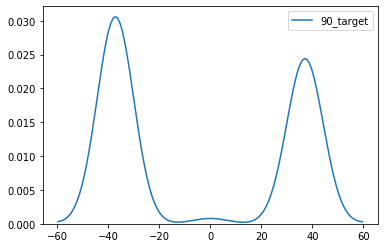

In [128]:
sns.kdeplot(data["90_target"])

In [129]:
cor = data.corr()["90_target"].abs()
cor

ind_5            0.073107
ind_6            0.073585
ind_8            0.011621
ind_9            0.013177
ind_10           0.014987
                   ...   
ind_426          0.003437
ind_428          0.058844
90_target        1.000000
ind_109_GREEN    0.026945
ind_109_RED      0.026945
Name: 90_target, Length: 135, dtype: float64

In [130]:
corr = cor.nlargest(10).index
corr

Index(['90_target', 'ind_18', 'ind_324', 'ind_412', 'ind_17', 'ind_315',
       'ind_16', 'ind_418', 'ind_77', 'ind_332'],
      dtype='object')

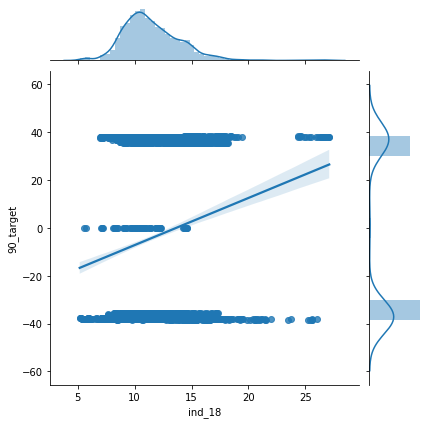

In [131]:
viz_data.jointplot(x="ind_18",y="90_target")

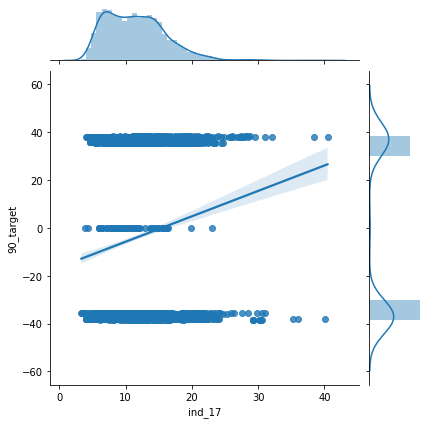

In [132]:
viz_data.jointplot(x="ind_17",y="90_target")

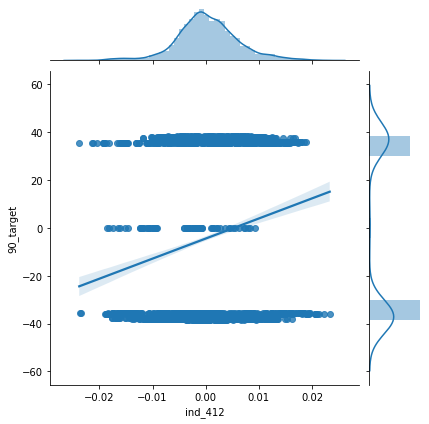

In [133]:
viz_data.jointplot(x="ind_412",y="90_target")

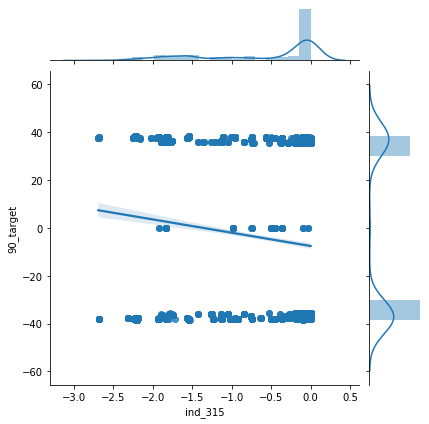

In [134]:
viz_data.jointplot(x="ind_315",y="90_target")

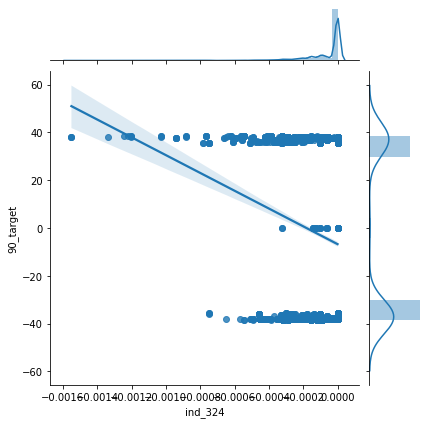

In [135]:
viz_data.jointplot(x="ind_324",y="90_target")

In [136]:
new_data = data[['ind_18', 'ind_324', 'ind_412', 'ind_17', 'ind_315','ind_16', 'ind_418', 'ind_77', 'ind_332']]
new_data.corr()

,ind_18,ind_324,ind_412,ind_17,ind_315,ind_16,ind_418,ind_77,ind_332
ind_18,1.000000,-0.247839,-0.037236,0.519406,-0.308114,0.397056,-0.364201,0.087033,0.081775
ind_324,-0.247839,1.000000,-0.271897,-0.129447,0.339597,-0.064688,0.412388,-0.396448,-0.180743
ind_412,-0.037236,-0.271897,1.000000,-0.047126,-0.028020,-0.031548,-0.317183,0.422127,0.116092
ind_17,0.519406,-0.129447,-0.047126,1.000000,-0.161937,0.921632,-0.403946,-0.004318,0.022079
ind_315,-0.308114,0.339597,-0.028020,-0.161937,1.000000,-0.145599,0.162454,-0.246071,-0.057487
ind_16,0.397056,-0.064688,-0.031548,0.921632,-0.145599,1.000000,-0.339586,-0.006383,0.001329
ind_418,-0.364201,0.412388,-0.317183,-0.403946,0.162454,-0.339586,1.000000,-0.393054,-0.170422
ind_77,0.087033,-0.396448,0.422127,-0.004318,-0.246071,-0.006383,-0.393054,1.000000,0.316005
ind_332,0.081775,-0.180743,0.116092,0.022079,-0.057487,0.001329,-0.170422,0.316005,1.000000


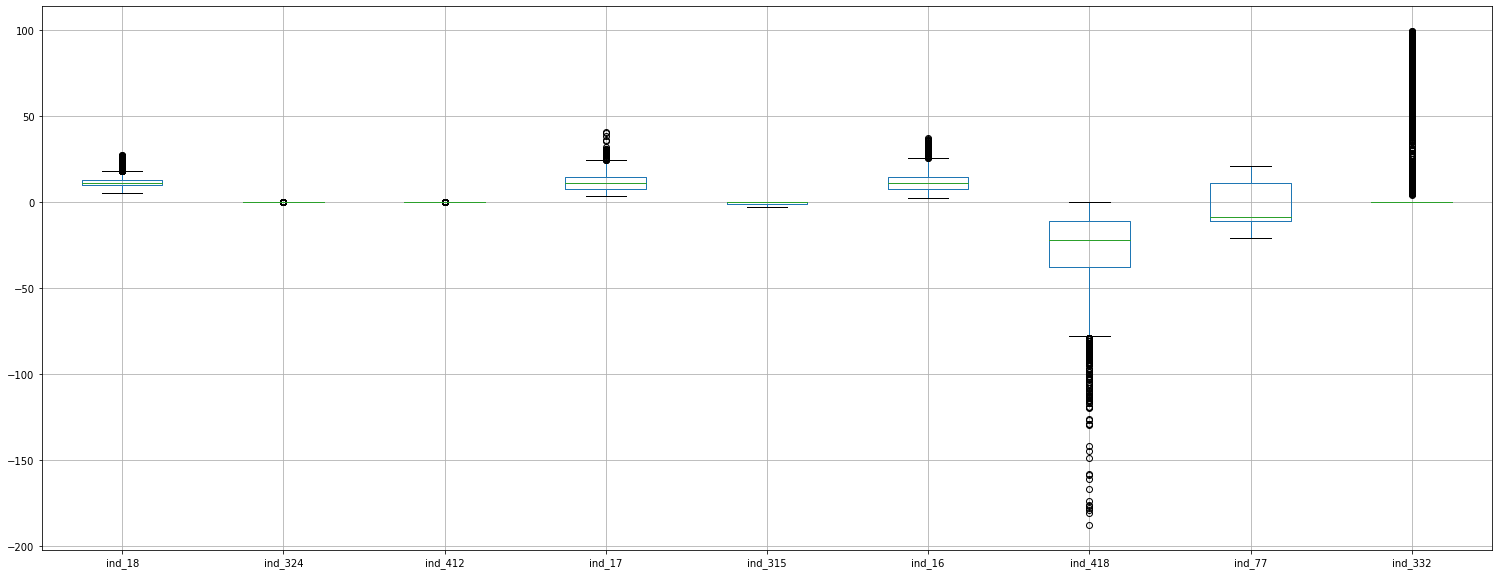

In [137]:
plt.figure(figsize=(26,10))
new_data.boxplot()
plt.show()

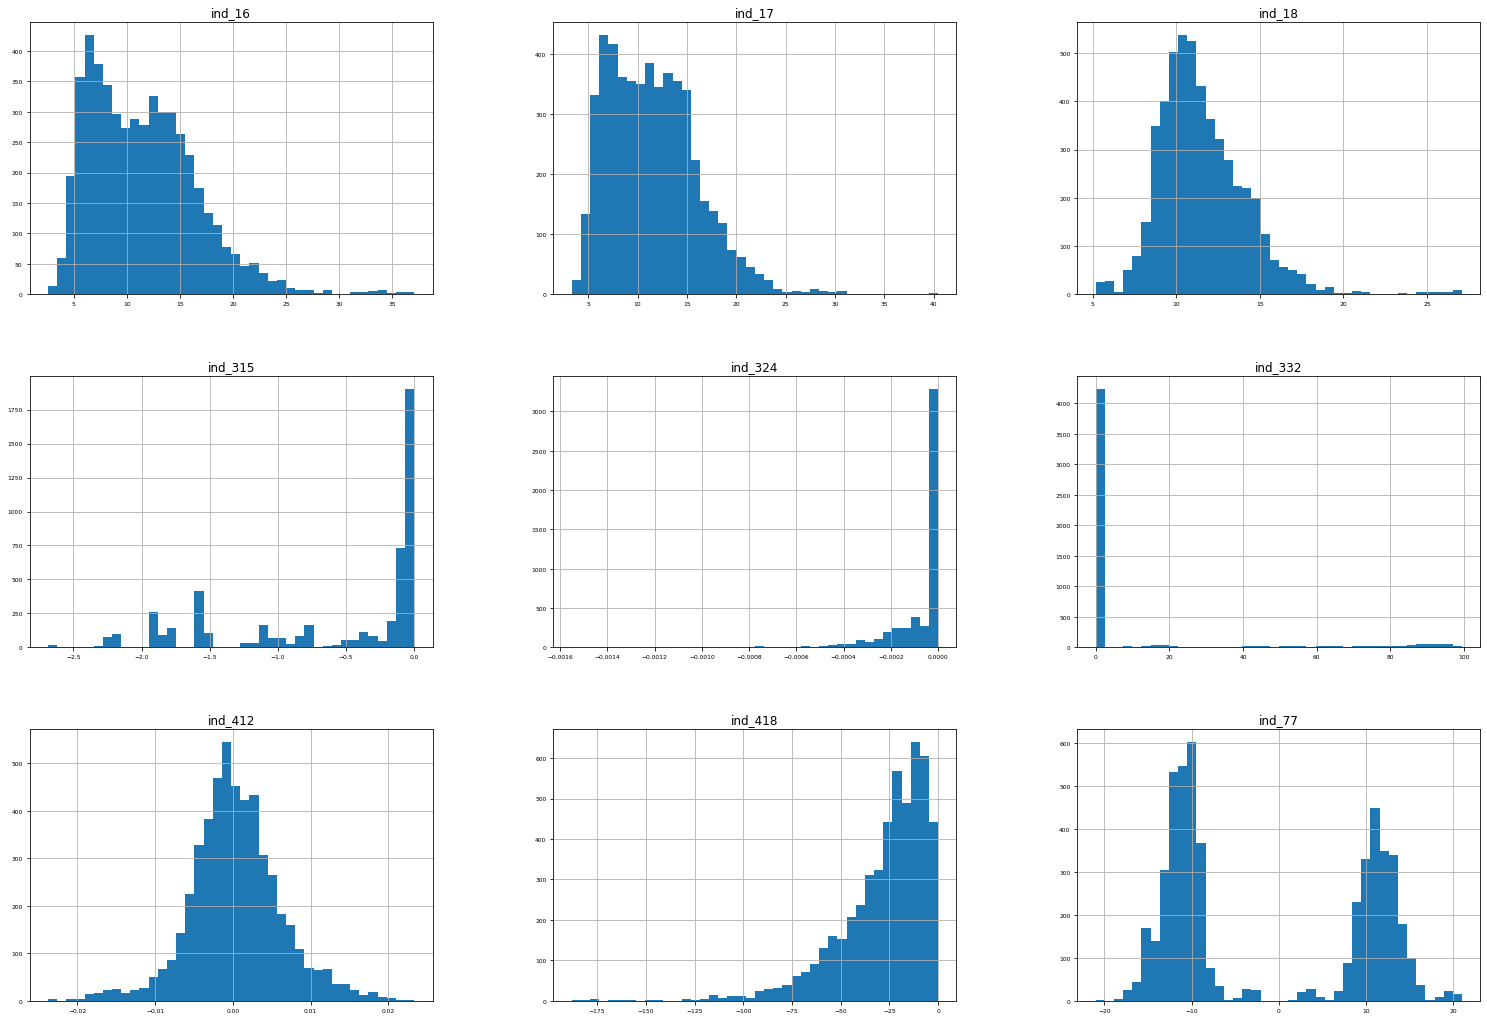

In [138]:
new_data.hist(figsize=(26,18), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

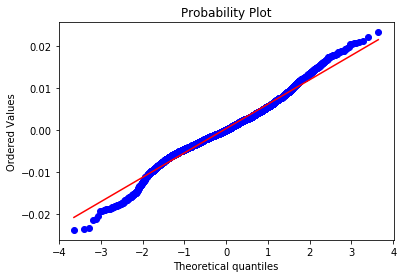

In [139]:
stats.probplot(new_data["ind_412"], dist = "norm", plot=pylab)
pylab.show()

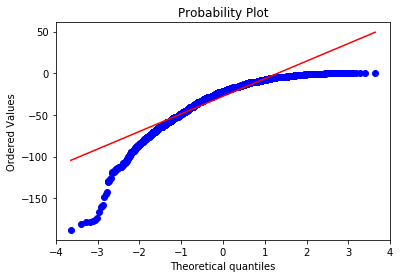

In [140]:
stats.probplot(new_data["ind_418"], dist = "norm", plot=pylab)
pylab.show()

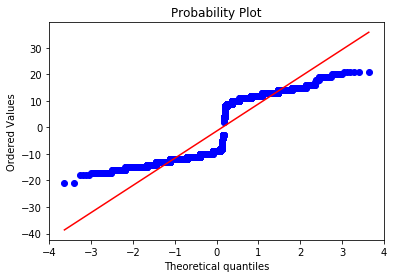

In [141]:
stats.probplot(new_data["ind_77"], dist = "norm", plot=pylab)
pylab.show()

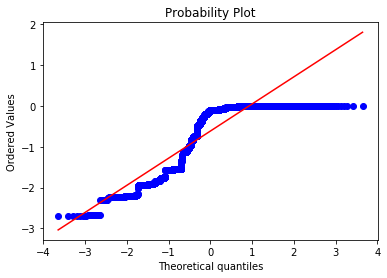

In [142]:
stats.probplot(new_data["ind_315"], dist = "norm", plot=pylab)
pylab.show()

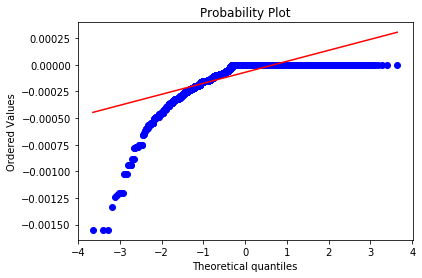

In [143]:
stats.probplot(new_data["ind_324"], dist = "norm", plot=pylab)
pylab.show()

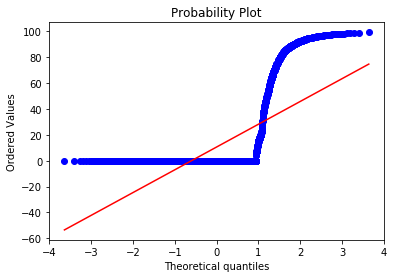

In [144]:
stats.probplot(new_data["ind_332"], dist = "norm", plot=pylab)
pylab.show()

In [145]:
for col in new_data.columns[1:]:
    if new_data[col].dtypes != object:
        
        stat, p = shapiro(new_data[col])

        print('Shapiro Statistics=%.3f, p=%.3f' % (stat, p))

        alpha = 0.05
        if p > alpha:
            print(col)
            print('\033[1m'+ col + '\033[0m','Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject) \n')
        else:
            print('\033[1m'+ col + ":"+'\033[0m','Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)\n')

Shapiro Statistics=0.581, p=0.000
ind_324: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.983, p=0.000
ind_412: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.953, p=0.000
ind_17: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.779, p=0.000
ind_315: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.944, p=0.000
ind_16: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.867, p=0.000
ind_418: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.797, p=0.000
ind_77: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)

Shapiro Statistics=0.454, p=0.000
ind_332: Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)



C:\Users\halil\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [188]:
y = data["90_target"]

In [189]:
X = new_data

In [190]:
X.head()

,ind_18,ind_324,ind_412,ind_17,ind_315,ind_16,ind_418,ind_77,ind_332
0,9.1100,-0.000062,0.002371,12.060000,-0.756946,11.73,-54,8,20.967742
1,9.2225,-0.000062,0.003074,11.326667,-0.756569,12.22,-60,8,20.800000
2,9.3125,-0.000062,0.003561,10.973333,-0.756393,12.28,-60,8,20.634921
3,9.4150,-0.000062,0.004366,10.426667,-0.756073,12.61,-65,8,20.472441
4,9.8925,-0.000062,0.004198,11.406667,-0.754789,14.25,-86,8,20.312500


In [191]:
lm = sm.OLS(y, X)

In [192]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.045
Model:                            OLS   Adj. R-squared (uncentered):              0.043
Method:                 Least Squares   F-statistic:                              26.64
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                    1.89e-45
Time:                        13:35:28   Log-Likelihood:                         -25649.
No. Observations:                5126   AIC:                                  5.132e+04
Df Residuals:                    5117   BIC:                                  5.138e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_18        -1.2228      0.148     -8.269      0.000      -1.513      -0.933
ind_324    -1.782e+04   4491.939     -3.967      0.000   -2.66e+04   -9013.281
ind_412      665.5167     98.304      6.770      0.000     472.799     858.235
ind_17         1.2329      0.324      3.804      0.000       0.597       1.868
ind_315       -3.3805      0.749     -4.513      0.000      -4.849      -1.912
ind_16        -0.5258      0.267     -1.971      0.049      -1.049      -0.003
ind_418        0.0493      0.029      1.703      0.089      -0.007       0.106
ind_77         0.0724      0.056      1.304      0.192      -0.036       0.181
ind_332        0.0908      0.020      4.449      0.000       0.051       0.131
==============================================================================
Omnibus:                    20771.715   Durbin-Watson:                   0.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.170
Skew:                           0.213   Prob(JB):                    1.13e-156
Kurtosis:                       1.217   Cond. No.                     3.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
X = X.drop(columns=['ind_324', 'ind_412'])

In [195]:
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.031
Method:                 Least Squares   F-statistic:                              24.14
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                    1.50e-32
Time:                        13:35:49   Log-Likelihood:                         -25683.
No. Observations:                5126   AIC:                                  5.138e+04
Df Residuals:                    5119   BIC:                                  5.143e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_18        -1.1726      0.149     -7.888      0.000      -1.464      -0.881
ind_17         1.1485      0.324      3.548      0.000       0.514       1.783
ind_315       -3.7732      0.726     -5.195      0.000      -5.197      -2.349
ind_16        -0.5478      0.266     -2.061      0.039      -1.069      -0.027
ind_418       -0.0252      0.028     -0.913      0.361      -0.079       0.029
ind_77         0.2328      0.052      4.444      0.000       0.130       0.335
ind_332        0.0920      0.021      4.484      0.000       0.052       0.132
==============================================================================
Omnibus:                    19902.034   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              756.973
Skew:                           0.211   Prob(JB):                    4.22e-165
Kurtosis:                       1.165   Cond. No.                         61.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = data.copy()

print("training", training.shape)

X_train (3844, 7)
y_train (3844,)
X_test (1282, 7)
y_test (1282,)
training (5126, 135)


In [197]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [198]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [199]:
X_reduced_train[0:1,:]

array([[ 2.50967106, -0.15486035,  0.12570516, -0.83452236, -0.87288995,
         0.465382  , -0.51667753]])

In [200]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]
# birinci bileşenin verisetinde bulunan varyansın %38 ini açıkladıgı görünmekte.
# ikinci bileşenin birinci bileşen ile birlikte verisetinde bulunan varyansın %59 ini açıkladıgı görünmekte.

array([37.95, 59.51, 73.19, 84.03, 92.91])

In [201]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [202]:
pcr_model.intercept_

-4.450958050920915

In [203]:
pcr_model.coef_

array([ 4.1959678 , -2.59809163,  1.09229364,  2.16911328, -0.69268464,
        1.58296437,  1.39946966])

In [204]:
y_pred = pcr_model.predict(X_reduced_train)

In [205]:
y_pred[0:5]
#Tahmin degerler

array([  5.42726176, -14.66029596,   8.4391311 , -11.60440057,
        -3.3615401 ])

In [206]:
np.sqrt(mean_squared_error(y_train, y_pred))

35.7145606905458

In [207]:
data["90_target"].mean()

-4.115568369248929

In [208]:
r2_score(y_train, y_pred)

0.04719491910775142

In [209]:
pca2 = PCA()

In [210]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [211]:
y_pred = pcr_model.predict(X_reduced_test)

In [212]:
np.sqrt(mean_squared_error(y_test, y_pred))

36.56721679383123

# Model Tuning

In [213]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
# Modelleme için 10 bileşen aldı. 10 yerine farklı bir rakam alınsaydı mse degeri degişecekti.
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

36.56721679383123


In [214]:
from sklearn import model_selection

In [215]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)
#10 katlı cross validation yapılandırması yapıldı.shuffle gruplara ayrılmadan önceden verilerin karıştırılacagını göstermekte.

In [216]:
RMSE = []

In [217]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

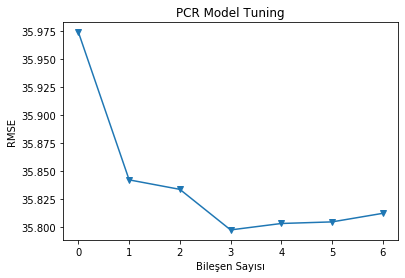

In [218]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning');

In [219]:
lm = LinearRegression()

In [220]:
pcr_model = lm.fit(X_reduced_train[:,0:3], y_train)

In [221]:
y_pred = pcr_model.predict(X_reduced_train[:,0:3])

In [222]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

35.785538534208


In [223]:
y_pred = pcr_model.predict(X_reduced_test[:,0:3])

In [224]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

36.41641941661561
